In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import json
import codecs
import requests

from bs4 import BeautifulSoup
import requests
import requests
import plotly.graph_objects as go

In [2]:
food = pd.read_csv('food_coded.csv')

In [3]:
food

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           122 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

** Seperating integer values **


In [5]:
food1=food.copy()

In [6]:
food1=food.drop(['GPA','Gender','calories_chicken','calories_scone','father_education','grade_level','mother_education','tortilla_calories','turkey_calories','waffle_calories'],axis=1)

In [7]:
food1

,breakfast,calories_day,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,...,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,type_sports,veggies_day,vitamins,weight
0,1,NaN,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,...,2,5.0,3.0,1.0,1.0,1,car racing,5,1,187
1,1,3.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,...,4,4.0,3.0,1.0,1.0,2,Basketball,4,2,155
2,1,4.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",...,3,5.0,6.0,1.0,2.0,5,none,5,1,I'm not answering this.
3,1,3.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",...,2,5.0,5.0,1.0,2.0,5,NaN,3,1,"Not sure, 240"
4,1,2.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,...,4,2.0,4.0,1.0,1.0,4,Softball,4,2,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,4.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,3.0,2,1.0,"My diet consists mainly of coffee, water, frui...",...,4,3.0,4.0,1.0,1.0,5,Softball,5,1,156
121,1,2.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,3.0,3,NaN,A college student with an imbalanced diet tryi...,...,4,1.0,4.0,1.0,NaN,4,basketball,5,2,180
122,1,NaN,1,"rice, potato, seaweed soup",sadness,NaN,3.0,3,NaN,"Rice, oatmeal, and tea",...,4,5.0,4.0,1.0,2.0,5,none,4,2,120
123,1,4.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,3.0,7,1.0,I try to eat as healthy as possible everyday. ...,...,3,1.0,2.0,2.0,2.0,1,NaN,3,1,135


In [8]:
a=food1.dtypes

In [9]:
a

breakfast                         int64
calories_day                    float64
coffee                            int64
comfort_food                     object
comfort_food_reasons             object
comfort_food_reasons_coded      float64
cook                            float64
comfort_food_reasons_coded.1      int64
cuisine                         float64
diet_current                     object
diet_current_coded                int64
drink                           float64
eating_changes                   object
eating_changes_coded              int64
eating_changes_coded1             int64
eating_out                        int64
employment                      float64
ethnic_food                       int64
exercise                        float64
father_profession                object
fav_cuisine                      object
fav_cuisine_coded                 int64
fav_food                        float64
food_childhood                   object
fries                             int64


In [10]:
z=food1.columns[:]

In [11]:
zz=len(z)

In [12]:
food2=food1.copy()

In [13]:
for i in range(zz):
    if a[i]=='object':
        food2.drop(z[i],axis=1,inplace=True)

In [14]:
food2

,breakfast,calories_day,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current_coded,drink,eating_changes_coded,...,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,veggies_day,vitamins
0,1,NaN,1,9.0,2.0,9,NaN,1,1.0,1,...,1.0,1,2,5.0,3.0,1.0,1.0,1,5,1
1,1,3.0,2,1.0,3.0,1,1.0,2,2.0,1,...,1.0,1,4,4.0,3.0,1.0,1.0,2,4,2
2,1,4.0,2,1.0,1.0,1,3.0,3,1.0,1,...,2.0,1,3,5.0,6.0,1.0,2.0,5,5,1
3,1,3.0,2,2.0,2.0,2,2.0,2,2.0,1,...,1.0,1,2,5.0,5.0,1.0,2.0,5,3,1
4,1,2.0,2,1.0,1.0,1,2.0,2,2.0,3,...,1.0,1,4,2.0,4.0,1.0,1.0,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,4.0,2,NaN,3.0,2,1.0,2,2.0,1,...,3.0,1,4,3.0,4.0,1.0,1.0,5,5,1
121,1,2.0,2,NaN,3.0,3,NaN,2,1.0,1,...,1.0,3,4,1.0,4.0,1.0,NaN,4,5,2
122,1,NaN,1,NaN,3.0,3,NaN,2,1.0,1,...,1.0,2,4,5.0,4.0,1.0,2.0,5,4,2
123,1,4.0,1,NaN,3.0,7,1.0,1,2.0,1,...,1.0,2,3,1.0,2.0,2.0,2.0,1,3,1


sepearating rating values

In [15]:
food3=food[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports', 'veggies_day']]

In [16]:
food3=food3.dropna()

In [17]:
food3

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
118,3.0,2,2.0,4,2.0,5,3.0,3.0,4,2.0,5
119,2.0,2,2.0,5,2.0,5,2.0,1.0,3,1.0,5
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4


<Axes: >

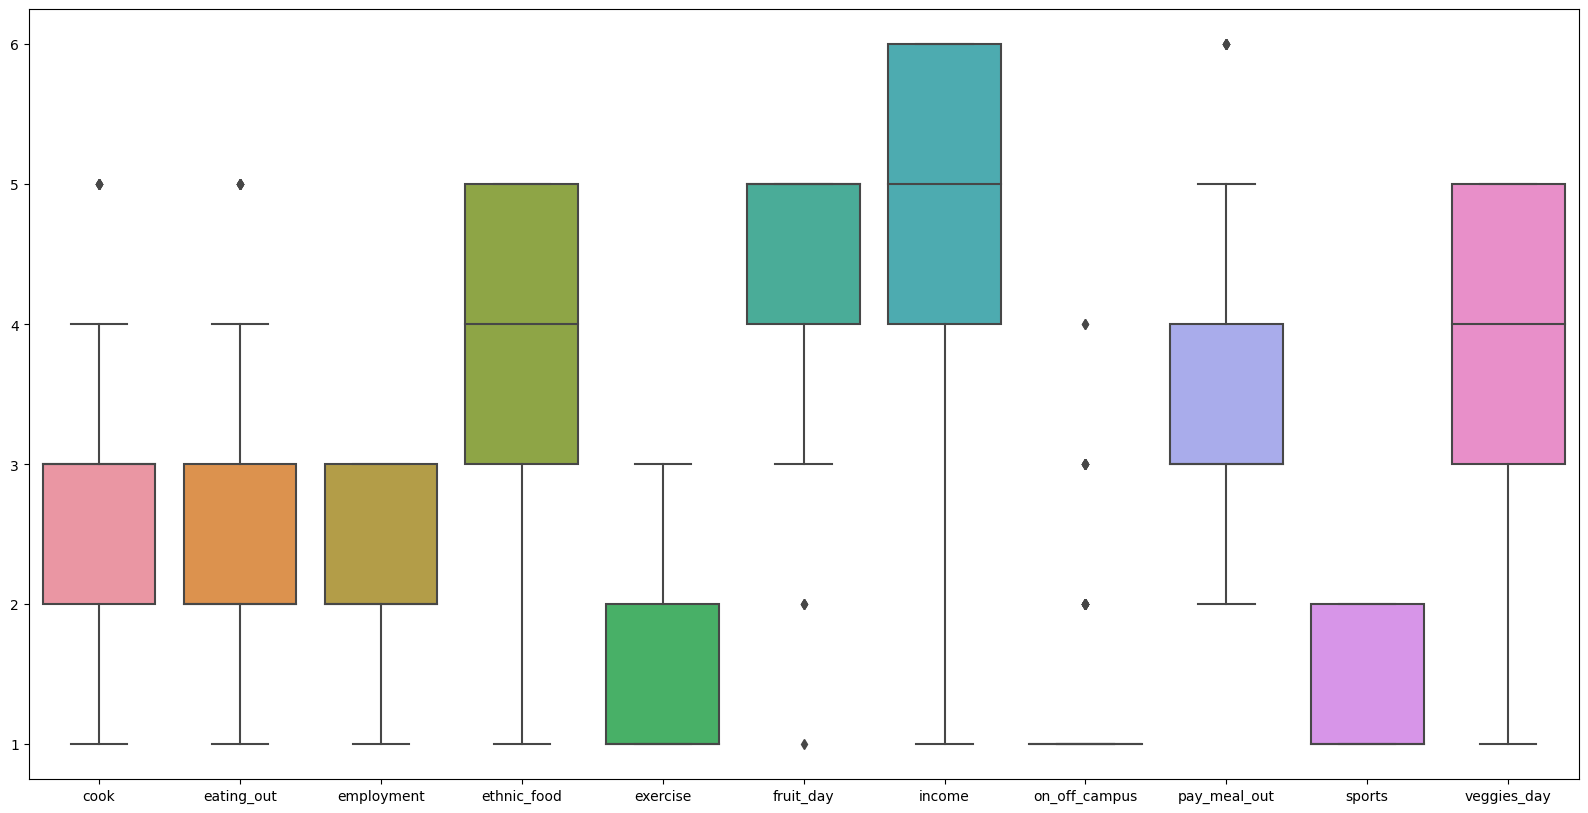

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=food3, ax = ax)

# Kmean clustering

In [19]:
myKmean=food3.copy()

C:\Config\Newpython\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Config\Newpython\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Config\Newpython\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Config\Newpython\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Config\Newpython\Lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

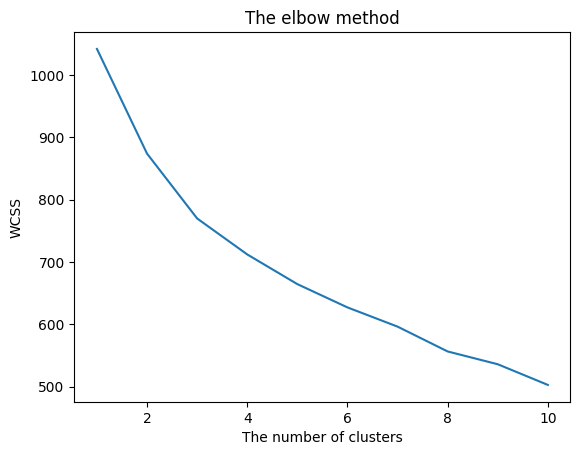

In [20]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init = 'k-means++',random_state=100)
  kmeans.fit(myKmean)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

**Generating API**

In [21]:

CLIENT_ID = 'N3IF5YDVM3GMUZCJGHED1CEY5ZHUUB1CF042V0S3QYQGX03H'
CLIENT_SECRET = '4QN3LHGIUPC5SKYPA4HEL3NQF2QCCG30WXDWXFJXAQLH4BFZ'
VERSION = '20230319'
LIMIT = 50


url = f"https://api.foursquare.com/v3/places/search?&client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&v={VERSION}&ll=30.733315,76.779419&radius=30000&limit={LIMIT}"

headers = {
    "accept": "application/json",
    "Authorization": "fsq3AnBPwDFPLKimTH5kyLmmp8ynxdbaQLcoqh8l8dSSFTc="
}

result = requests.get(url, headers=headers).json()




In [22]:
result

{'results': [{'fsq_id': '5006bbdce4b07b32691456c6',
   'categories': [{'id': 13032,
     'name': 'Cafes, Coffee, and Tea Houses',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
      'suffix': '.png'}}],
   'chains': [],
   'distance': 714,
   'geocodes': {'main': {'latitude': 30.729963, 'longitude': 76.77332},
    'roof': {'latitude': 30.729963, 'longitude': 76.77332}},
   'link': '/v3/places/5006bbdce4b07b32691456c6',
   'location': {'address': 'Hotel Aquamarine, Ground Floor, The Lobby',
    'address_extended': 'Next To Hotel Aroma, Sector 22 C',
    'country': 'IN',
    'cross_street': 'Hotel The Aroma',
    'formatted_address': 'Hotel Aquamarine, Ground Floor, The Lobby (Hotel The Aroma), Chandigarh 160022, Chandigarh',
    'locality': 'Chandigarh',
    'postcode': '160022',
    'region': 'Chandigarh'},
   'name': 'The Coffee Bean and Tea Leaf',
   'related_places': {},
   'timezone': 'Asia/Kolkata'},
  {'fsq_id': '4d822ef6baf9a35d1fc8a421',
   'ca

In [23]:
dataframe = pd.json_normalize(result['results'])

In [24]:
dataframe

,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,...,location.address_extended,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,related_places.parent.fsq_id,related_places.parent.name,related_places.children
0,5006bbdce4b07b32691456c6,"[{'id': 13032, 'name': 'Cafes, Coffee, and Tea...",[],714,/v3/places/5006bbdce4b07b32691456c6,The Coffee Bean and Tea Leaf,Asia/Kolkata,30.729963,76.773320,30.729963,...,"Next To Hotel Aroma, Sector 22 C",IN,Hotel The Aroma,"Hotel Aquamarine, Ground Floor, The Lobby (Hot...",Chandigarh,160022,Chandigarh,NaN,NaN,NaN
1,4d822ef6baf9a35d1fc8a421,"[{'id': 13034, 'name': 'Café', 'icon': {'prefi...",[],699,/v3/places/4d822ef6baf9a35d1fc8a421,Girl in the Cafe,Asia/Kolkata,30.737973,76.784424,30.737973,...,2nd Floor,IN,Sector 17,"Sco 117-119, Level Ii Above Canara Bank, Secto...",Chandigarh,160017,Chandigarh,4c0a1876bbc676b0154e49d5,Sector 17,NaN
2,4ecf6cee4690a03b5c28e095,"[{'id': 17000, 'name': 'Retail', 'icon': {'pre...",[],1041,/v3/places/4ecf6cee4690a03b5c28e095,Jagat Singh and Sons Agencies,Asia/Kolkata,30.728175,76.770335,30.728175,...,NaN,IN,Himalaya Marg,"S.C.O. 2449-50, Sector 22C, Himalaya Marg (Him...",Chandigarh,160022,Chandigarh,NaN,NaN,NaN
3,4c0a1876bbc676b0154e49d5,"[{'id': 17096, 'name': 'Miscellaneous Store', ...",[],739,/v3/places/4c0a1876bbc676b0154e49d5,Sector 17,Asia/Kolkata,30.739678,76.782067,30.739678,...,NaN,IN,,"Sector 17, Chandigarh 160007, Punjab",Chandigarh,160007,Punjab,NaN,NaN,"[{'fsq_id': '58fd976ddd70c5619bb81d90', 'name'..."
4,4bd1b65d046076b07e477271,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",[],740,/v3/places/4bd1b65d046076b07e477271,Ghazal Restaurant,Asia/Kolkata,30.739725,76.782689,30.739725,...,NaN,IN,,"189-91, Sector-17, Chandigarh 941735, Chandigarh",Chandigarh,941735,Chandigarh,NaN,NaN,NaN
5,4ba37b0ff964a520b94038e3,"[{'id': 13035, 'name': 'Coffee Shop', 'icon': ...",[],2076,/v3/places/4ba37b0ff964a520b94038e3,Backpackers Cafe,Asia/Kolkata,30.747600,76.793435,NaN,...,"Near Chandigarh Dance Academy, Sector 9",IN,,"16 Inner Market, Sector 9D, Chandigarh 160009,...",Chandigarh,160009,Chandigarh,NaN,NaN,NaN
6,4c0ba827009a0f47975cebbf,"[{'id': 16017, 'name': 'Garden', 'icon': {'pre...",[],1425,/v3/places/4c0ba827009a0f47975cebbf,Rose Garden,Asia/Kolkata,30.745970,76.781791,NaN,...,NaN,IN,NaN,"Sector 16, Chandigarh 941735, Chandigarh",Chandigarh,941735,Chandigarh,NaN,NaN,NaN
7,4d1f4438d7b0b1f776790b9f,"[{'id': 13046, 'name': 'Ice Cream Parlor', 'ic...",[],816,/v3/places/4d1f4438d7b0b1f776790b9f,Softy Corner,Asia/Kolkata,30.739866,76.782572,30.739866,...,NaN,IN,Sector 17,"89-90-91, Sector 17 (Sector 17), Chandigarh 16...",Chandigarh,160017,Chandigarh,NaN,NaN,NaN
8,4bbf61eef353d13a29837e10,"[{'id': 13026, 'name': 'BBQ Joint', 'icon': {'...",[],2605,/v3/places/4bbf61eef353d13a29837e10,Barbeque Nation,Asia/Kolkata,30.725643,76.805303,NaN,...,NaN,IN,sector 26,"39 Madhya Marg Sector 26 (sector 26), Chandiga...",Chandigarh,160019,Punjab,NaN,NaN,NaN
9,4bd6f81229eb9c7429e295e1,"[{'id': 13002, 'name': 'Bakery', 'icon': {'pre...",[],2262,/v3/places/4bd6f81229eb9c7429e295e1,Nik Bakers,Asia/Kolkata,30.721627,76.760191,NaN,...,NaN,IN,Qwwqe,"Sector 35-c (Qwwqe), Chandigarh 160009, Chandi...",Chandigarh,160009,Chandigarh,NaN,NaN,NaN


In [25]:
resta=[]
oth=[]
for lat,lng in zip(dataframe['geocodes.main.latitude'],dataframe['geocodes.main.longitude']):
    url = f"https://api.foursquare.com/v3/places/search?&client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&v={VERSION}&ll=13.0306,77.5649&radius=30000&limit={LIMIT}"

    headers = {
    "accept": "application/json",
    "Authorization": "fsq3AnBPwDFPLKimTH5kyLmmp8ynxdbaQLcoqh8l8dSSFTc="
    }

    res = requests.get(url, headers=headers).json()
    venue = res['results']
    result = pd.json_normalize(venue)
    df=dataframe['categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)
result
     

,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,...,location.formatted_address,location.locality,location.postcode,location.region,related_places.children,location.address_extended,related_places.parent.fsq_id,related_places.parent.name,geocodes.drop_off.latitude,geocodes.drop_off.longitude
0,4bf0ff0524f020a129a4684f,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",[],290,/v3/places/4bf0ff0524f020a129a4684f,Biriyani Paradise,Asia/Kolkata,13.030628,77.562068,13.030628,...,"Triveni Road, Mathikere, Bangalore 560057, Kar...",Bangalore,560057,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN
1,4f0b2674e4b0ca3a5efdaeaf,"[{'id': 13031, 'name': 'Burger Joint', 'icon':...",[],932,/v3/places/4f0b2674e4b0ca3a5efdaeaf,Ice N Spice by truffles,Asia/Kolkata,13.028196,77.573153,13.028196,...,"Near Ramaiah Medical College (80 Feet Road), B...",Bangalore,941735,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN
2,4f1869c7e4b0ebf9e4ae9134,"[{'id': 17114, 'name': 'Shopping Mall', 'icon'...",[],2394,/v3/places/4f1869c7e4b0ebf9e4ae9134,Orion Mall,Asia/Kolkata,13.011306,77.554906,NaN,...,"Dr. Rajkumar Rd, Rajajinagar, Bangalore 560055...",Bangalore,560055,Karnātaka,"[{'fsq_id': '557050eb498e7431c9a3119b', 'name'...",NaN,NaN,NaN,NaN,NaN
3,50927aac498eeb726337e5b9,"[{'id': 10024, 'name': 'Movie Theater', 'icon'...",[],2447,/v3/places/50927aac498eeb726337e5b9,PVR Cinemas,Asia/Kolkata,13.010717,77.554786,NaN,...,"Orion Mall, Brigade Gateway (26/1, Dr.Rajkumar...",Bangalore,560025,Karnātaka,[],NaN,NaN,NaN,NaN,NaN
4,4f734b06e4b0601c70d3a30f,"[{'id': 13236, 'name': 'Italian Restaurant', '...",[],1706,/v3/places/4f734b06e4b0601c70d3a30f,Mezzaluna,Asia/Kolkata,13.042207,77.554747,13.042207,...,"Movenpick Hotel .And Spa, 115, Gokula Extensio...",Bangalore,560013,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN
5,531ed995498ef21f6f904159,"[{'id': 10024, 'name': 'Movie Theater', 'icon'...",[],2434,/v3/places/531ed995498ef21f6f904159,"PVR Gold Class, Orion",Asia/Kolkata,13.010956,77.555121,NaN,...,904159,NaN,904159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4f93d338e4b01cffa1f2a8a2,"[{'id': 17000, 'name': 'Retail', 'icon': {'pre...",[],2399,/v3/places/4f93d338e4b01cffa1f2a8a2,Central Orion Mall,Asia/Kolkata,13.011022,77.554963,NaN,...,"Ug-7 .And Ug-8, F-107 .And F-108, Upper Ground...",Bangalore,560010,Karnātaka,NaN,1st Floor,4f1869c7e4b0ebf9e4ae9134,Orion Mall,NaN,NaN
7,4f58cf41e4b0fbb1bbb8cae5,"[{'id': 13016, 'name': 'Lounge', 'icon': {'pre...",[],2285,/v3/places/4f58cf41e4b0fbb1bbb8cae5,The Persian Terrace @ Sheraton Bridgade Gateway,Asia/Kolkata,13.012308,77.555340,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,50269b31e4b0727083f0dde8,"[{'id': 10006, 'name': 'Bowling Alley', 'icon'...",[],2405,/v3/places/50269b31e4b0727083f0dde8,PVR bluO,Asia/Kolkata,13.011262,77.555126,NaN,...,"Orion Mall (Rajajinagar), Bangalore 560055, Ka...",Bangalore,560055,Karnātaka,NaN,4th Floor,4f1869c7e4b0ebf9e4ae9134,Orion Mall,NaN,NaN
9,4f9bc578e4b065054bbfa6ef,"[{'id': 13236, 'name': 'Italian Restaurant', '...",[],2310,/v3/places/4f9bc578e4b065054bbfa6ef,Toscano,Asia/Kolkata,13.008006,77.550161,13.008006,...,"Brigade Orion Mall, Bangalore 941735, Karnātaka",Bangalore,941735,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
dataframe['restaurant'] = pd.Series(resta)
dataframe['others']=pd.Series(oth)    

In [27]:
dataframe

,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,...,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,related_places.parent.fsq_id,related_places.parent.name,related_places.children,restaurant,others
0,5006bbdce4b07b32691456c6,"[{'id': 13032, 'name': 'Cafes, Coffee, and Tea...",[],714,/v3/places/5006bbdce4b07b32691456c6,The Coffee Bean and Tea Leaf,Asia/Kolkata,30.729963,76.773320,30.729963,...,Hotel The Aroma,"Hotel Aquamarine, Ground Floor, The Lobby (Hot...",Chandigarh,160022,Chandigarh,NaN,NaN,NaN,35,15
1,4d822ef6baf9a35d1fc8a421,"[{'id': 13034, 'name': 'Café', 'icon': {'prefi...",[],699,/v3/places/4d822ef6baf9a35d1fc8a421,Girl in the Cafe,Asia/Kolkata,30.737973,76.784424,30.737973,...,Sector 17,"Sco 117-119, Level Ii Above Canara Bank, Secto...",Chandigarh,160017,Chandigarh,4c0a1876bbc676b0154e49d5,Sector 17,NaN,35,15
2,4ecf6cee4690a03b5c28e095,"[{'id': 17000, 'name': 'Retail', 'icon': {'pre...",[],1041,/v3/places/4ecf6cee4690a03b5c28e095,Jagat Singh and Sons Agencies,Asia/Kolkata,30.728175,76.770335,30.728175,...,Himalaya Marg,"S.C.O. 2449-50, Sector 22C, Himalaya Marg (Him...",Chandigarh,160022,Chandigarh,NaN,NaN,NaN,35,15
3,4c0a1876bbc676b0154e49d5,"[{'id': 17096, 'name': 'Miscellaneous Store', ...",[],739,/v3/places/4c0a1876bbc676b0154e49d5,Sector 17,Asia/Kolkata,30.739678,76.782067,30.739678,...,,"Sector 17, Chandigarh 160007, Punjab",Chandigarh,160007,Punjab,NaN,NaN,"[{'fsq_id': '58fd976ddd70c5619bb81d90', 'name'...",35,15
4,4bd1b65d046076b07e477271,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",[],740,/v3/places/4bd1b65d046076b07e477271,Ghazal Restaurant,Asia/Kolkata,30.739725,76.782689,30.739725,...,,"189-91, Sector-17, Chandigarh 941735, Chandigarh",Chandigarh,941735,Chandigarh,NaN,NaN,NaN,35,15
5,4ba37b0ff964a520b94038e3,"[{'id': 13035, 'name': 'Coffee Shop', 'icon': ...",[],2076,/v3/places/4ba37b0ff964a520b94038e3,Backpackers Cafe,Asia/Kolkata,30.747600,76.793435,NaN,...,,"16 Inner Market, Sector 9D, Chandigarh 160009,...",Chandigarh,160009,Chandigarh,NaN,NaN,NaN,35,15
6,4c0ba827009a0f47975cebbf,"[{'id': 16017, 'name': 'Garden', 'icon': {'pre...",[],1425,/v3/places/4c0ba827009a0f47975cebbf,Rose Garden,Asia/Kolkata,30.745970,76.781791,NaN,...,NaN,"Sector 16, Chandigarh 941735, Chandigarh",Chandigarh,941735,Chandigarh,NaN,NaN,NaN,35,15
7,4d1f4438d7b0b1f776790b9f,"[{'id': 13046, 'name': 'Ice Cream Parlor', 'ic...",[],816,/v3/places/4d1f4438d7b0b1f776790b9f,Softy Corner,Asia/Kolkata,30.739866,76.782572,30.739866,...,Sector 17,"89-90-91, Sector 17 (Sector 17), Chandigarh 16...",Chandigarh,160017,Chandigarh,NaN,NaN,NaN,35,15
8,4bbf61eef353d13a29837e10,"[{'id': 13026, 'name': 'BBQ Joint', 'icon': {'...",[],2605,/v3/places/4bbf61eef353d13a29837e10,Barbeque Nation,Asia/Kolkata,30.725643,76.805303,NaN,...,sector 26,"39 Madhya Marg Sector 26 (sector 26), Chandiga...",Chandigarh,160019,Punjab,NaN,NaN,NaN,35,15
9,4bd6f81229eb9c7429e295e1,"[{'id': 13002, 'name': 'Bakery', 'icon': {'pre...",[],2262,/v3/places/4bd6f81229eb9c7429e295e1,Nik Bakers,Asia/Kolkata,30.721627,76.760191,NaN,...,Qwwqe,"Sector 35-c (Qwwqe), Chandigarh 160009, Chandi...",Chandigarh,160009,Chandigarh,NaN,NaN,NaN,35,15


In [28]:
dataframe=dataframe[['geocodes.main.latitude','geocodes.main.longitude','restaurant','others','location.formatted_address']]

In [29]:
dataframe

,geocodes.main.latitude,geocodes.main.longitude,restaurant,others,location.formatted_address
0,30.729963,76.773320,35,15,"Hotel Aquamarine, Ground Floor, The Lobby (Hot..."
1,30.737973,76.784424,35,15,"Sco 117-119, Level Ii Above Canara Bank, Secto..."
2,30.728175,76.770335,35,15,"S.C.O. 2449-50, Sector 22C, Himalaya Marg (Him..."
3,30.739678,76.782067,35,15,"Sector 17, Chandigarh 160007, Punjab"
4,30.739725,76.782689,35,15,"189-91, Sector-17, Chandigarh 941735, Chandigarh"
5,30.747600,76.793435,35,15,"16 Inner Market, Sector 9D, Chandigarh 160009,..."
6,30.745970,76.781791,35,15,"Sector 16, Chandigarh 941735, Chandigarh"
7,30.739866,76.782572,35,15,"89-90-91, Sector 17 (Sector 17), Chandigarh 16..."
8,30.725643,76.805303,35,15,"39 Madhya Marg Sector 26 (sector 26), Chandiga..."
9,30.721627,76.760191,35,15,"Sector 35-c (Qwwqe), Chandigarh 160009, Chandi..."


In [30]:
dataframe = dataframe.dropna()

In [31]:
dataframe2 = dataframe.copy()

In [32]:
dataframe2 = dataframe2.drop(['location.formatted_address'],axis=1)

In [33]:
dataframe2.head()

,geocodes.main.latitude,geocodes.main.longitude,restaurant,others
0,30.729963,76.773320,35,15
1,30.737973,76.784424,35,15
2,30.728175,76.770335,35,15
3,30.739678,76.782067,35,15
4,30.739725,76.782689,35,15


# Plotting clustered values


C:\Config\Newpython\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Config\Newpython\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Config\Newpython\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Config\Newpython\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Config\Newpython\Lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

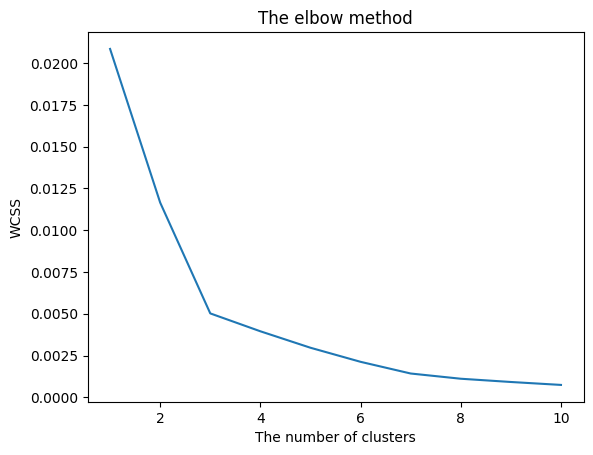

In [34]:

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init = 'k-means++',random_state=42)
  kmeans.fit(dataframe2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:

kmeans=KMeans(n_clusters=5, init='k-means++',random_state=42)
dataframe2['cluster']=kmeans.fit_predict(dataframe2) 

C:\Config\Newpython\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
dataframe2

,geocodes.main.latitude,geocodes.main.longitude,restaurant,others,cluster
0,30.729963,76.773320,35,15,1
1,30.737973,76.784424,35,15,2
2,30.728175,76.770335,35,15,1
3,30.739678,76.782067,35,15,2
4,30.739725,76.782689,35,15,2
5,30.747600,76.793435,35,15,0
6,30.745970,76.781791,35,15,2
7,30.739866,76.782572,35,15,2
8,30.725643,76.805303,35,15,3
9,30.721627,76.760191,35,15,1


In [37]:
closest = kmeans.cluster_centers_
dataframe2["centroids"] = 0
for i in range(len(closest)):
    dataframe2["centroids"].iloc[i] = 1

C:\Users\Tushar bajaj\AppData\Local\Temp\ipykernel_40060\1070665070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe2["centroids"].iloc[i] = 1


In [38]:
dataframe2[dataframe2['centroids']==1]

,geocodes.main.latitude,geocodes.main.longitude,restaurant,others,cluster,centroids
0,30.729963,76.773320,35,15,1,1
1,30.737973,76.784424,35,15,2,1
2,30.728175,76.770335,35,15,1,1
3,30.739678,76.782067,35,15,2,1
4,30.739725,76.782689,35,15,2,1


In [39]:
dataframe2['location.formatted_address'] = dataframe['location.formatted_address']
dataframe2.head()

,geocodes.main.latitude,geocodes.main.longitude,restaurant,others,cluster,centroids,location.formatted_address
0,30.729963,76.773320,35,15,1,1,"Hotel Aquamarine, Ground Floor, The Lobby (Hot..."
1,30.737973,76.784424,35,15,2,1,"Sco 117-119, Level Ii Above Canara Bank, Secto..."
2,30.728175,76.770335,35,15,1,1,"S.C.O. 2449-50, Sector 22C, Himalaya Marg (Him..."
3,30.739678,76.782067,35,15,2,1,"Sector 17, Chandigarh 160007, Punjab"
4,30.739725,76.782689,35,15,2,1,"189-91, Sector-17, Chandigarh 941735, Chandigarh"


In [40]:

import folium
import geopy
m = folium.Map(location=[12, -122.6750])

In [41]:
city = "Chandigarh"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, lng]:", location)

Chandigarh, India
[lat, lng]: [30.72984395, 76.78414567016054]


In [42]:
import sklearn.preprocessing
import folium
x, y = "geocodes.main.latitude", "geocodes.main.longitude"
color = "cluster"
size = "restaurant"
popup = "location.formatted_address"
marker = "centroids"
data = dataframe2.copy()
## create color column
lst_elements = sorted(list(dataframe2[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xF3FF5F) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """ """+color+""":"""
for i in lst_elements:
     legend_html = legend_html+""" 
      """+str(i)+""""""
legend_html = legend_html+""""""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(dataframe2[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_